In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [2]:
## suppress warning for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("housingdata1.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.shape

(34857, 21)

In [6]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
df['log_price'] = np.log(df['Price'])

In [9]:
use_the_data = ['Suburb','BuildingArea','Rooms','Type','Method','SellerG','Price','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize']

In [10]:
dataset = df[use_the_data]

In [11]:
dataset.shape

(34857, 15)

In [12]:
dataset.isna().sum()

Suburb               0
BuildingArea     21115
Rooms                0
Type                 0
Method               0
SellerG              0
Price             7610
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
dtype: int64

In [13]:
column_to_fill_with_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[column_to_fill_with_zero] = dataset[column_to_fill_with_zero].fillna(0)
dataset.isna().sum()

Suburb               0
BuildingArea     21115
Rooms                0
Type                 0
Method               0
SellerG              0
Price             7610
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
dtype: int64

In [14]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [15]:
dataset.isna().sum()

Suburb              0
BuildingArea        0
Rooms               0
Type                0
Method              0
SellerG             0
Price            7610
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
dtype: int64

In [16]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
BuildingArea     0
Rooms            0
Type             0
Method           0
SellerG          0
Price            0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
dtype: int64

In [17]:
datasetle = dataset
datasetle.shape

(27244, 15)

In [18]:
datasetle.columns

Index(['Suburb', 'BuildingArea', 'Rooms', 'Type', 'Method', 'SellerG', 'Price',
       'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize'],
      dtype='object')

In [19]:
datasetle.head()

,Suburb,BuildingArea,Rooms,Type,Method,SellerG,Price,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize
1,Abbotsford,160.2564,2,h,S,Biggin,1480000.0,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0
2,Abbotsford,79.0000,2,h,S,Biggin,1035000.0,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0
4,Abbotsford,150.0000,3,h,SP,Biggin,1465000.0,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0
5,Abbotsford,160.2564,3,h,PI,Biggin,850000.0,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.0
6,Abbotsford,142.0000,4,h,VB,Nelson,1600000.0,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
datasetle.Suburb = le.fit_transform(datasetle.Suburb)
datasetle.Method= le.fit_transform(datasetle.Method)
datasetle.Regionname = le.fit_transform(datasetle.Regionname)
datasetle.CouncilArea = le.fit_transform(datasetle.CouncilArea)
datasetle.SellerG = le.fit_transform(datasetle.SellerG)
datasetle.Type = le.fit_transform(datasetle.Type)
datasetle.head(3)

,Suburb,BuildingArea,Rooms,Type,Method,SellerG,Price,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize
1,0,160.2564,2,0,1,32,1480000.0,2,4019.0,2.5,31,2.0,1.0,1.0,202.0
2,0,79.0000,2,0,1,32,1035000.0,2,4019.0,2.5,31,2.0,1.0,0.0,156.0
4,0,150.0000,3,0,3,32,1465000.0,2,4019.0,2.5,31,3.0,2.0,0.0,134.0


In [22]:
##sns.pairplot(datasetle)

<AxesSubplot:>

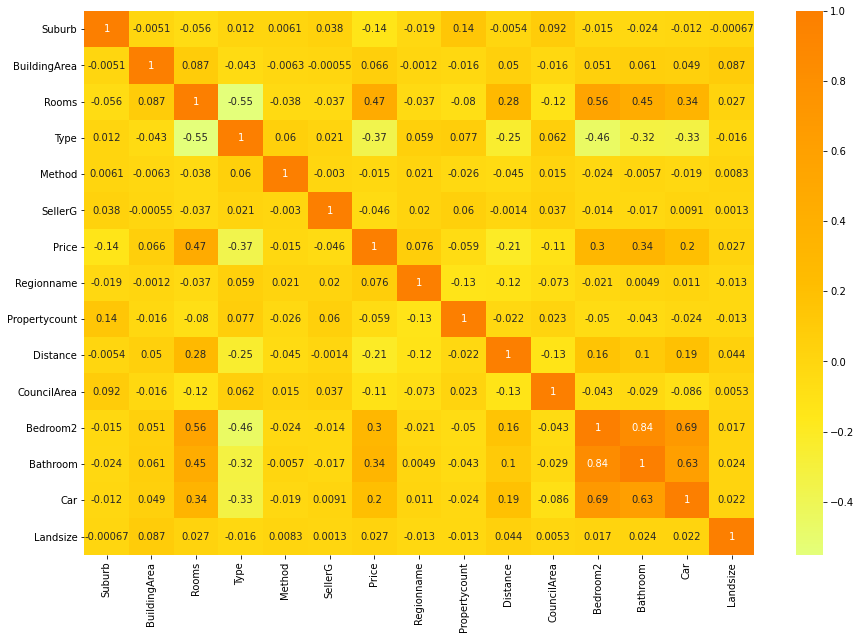

In [23]:
plt.figure(figsize=(15,10))
correlation = datasetle.corr()
sns.heatmap(correlation, cmap = 'Wistia', annot= True)

In [24]:
x = datasetle.drop('Price',axis =1)
y = datasetle['Price']


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [26]:
## simple linear regression

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
reg.coef_, reg.intercept_

(array([-6.63088611e+02,  5.04670252e+01,  2.96010999e+05, -1.83760107e+05,
        -3.03424516e+03, -1.26134684e+02,  1.43463583e+04,  1.61193412e+00,
        -3.76236583e+04, -5.15747334e+03, -1.18224675e+05,  2.17338593e+05,
         2.51433072e+04,  4.22627032e+00]),
 799784.0189748709)

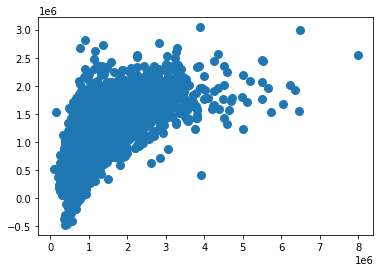

In [28]:
y_predicted = reg.predict(x_test)
plt.scatter(y_test,y_predicted,linewidth=3)

In [29]:
residuals = y_predicted-y_test

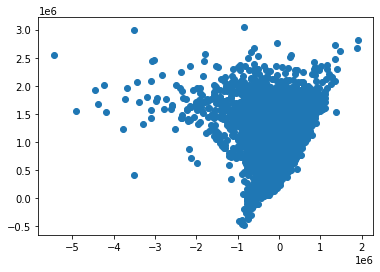

In [30]:
plt.scatter(residuals,y_predicted)

In [31]:
reg.score(x_test,y_test)

0.4404700045922715

In [32]:
reg.score(x_train,y_train)

0.427670181368522

In [33]:
## linear regression with lasso 

In [34]:
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [35]:
coefficient = lasso_reg.coef_
coefficient

array([-6.63147640e+02,  5.04944631e+01,  2.95914728e+05, -1.83653213e+05,
       -2.99643298e+03, -1.26150005e+02,  1.43369272e+04,  1.61064564e+00,
       -3.76183002e+04, -5.15821184e+03, -1.17938347e+05,  2.17023113e+05,
        2.50415650e+04,  4.22699699e+00])

In [36]:
x_test.columns

Index(['Suburb', 'BuildingArea', 'Rooms', 'Type', 'Method', 'SellerG',
       'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize'],
      dtype='object')

In [37]:
## Plotting the regression coefficient 

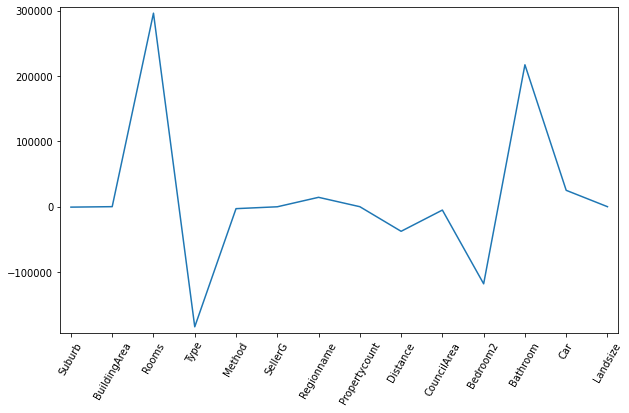

In [38]:
colnames = x_test.columns
##print(colnames)
plt.figure(figsize=(10,6))
plt.plot(range(len(colnames)),coefficient)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [39]:
intercept = lasso_reg.intercept_
intercept

799810.0795533818

In [40]:
## plotting the coeffcient


In [41]:
lasso_reg.score(x_train,y_train)

0.4276700658342376

In [42]:
lasso_reg.score(x_test,y_test)

0.4404658242193257

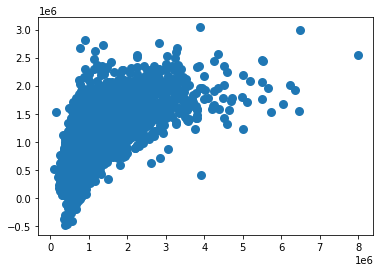

In [43]:
y_predicted = lasso_reg.predict(x_test)
plt.scatter(y_test,y_predicted,linewidth=3)

In [44]:
residuals = y_predicted-y_test

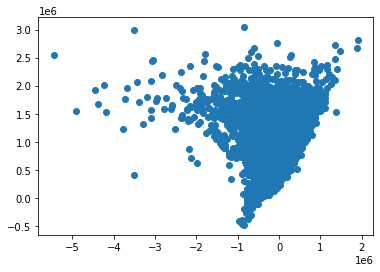

In [45]:
plt.scatter(residuals,y_predicted)

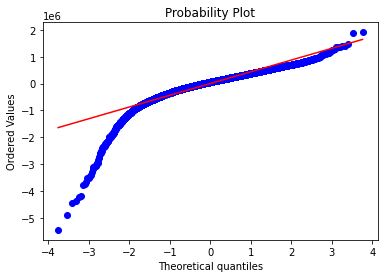

In [46]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [ ]:
##dataset[log_price] = np.log(dataset['Price'])
##plt.hist(data)

In [ ]:
## ridge regression 

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [49]:
ridge_reg.score(x_train,y_train)

0.42766085785381114

In [50]:
ridge_reg.score(x_test,y_test)

0.44041350089631515